In [37]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, y_train), _ = cifar10.load_data()

# Filter data for horses, airplanes, and deer
categories = [0, 4, 7]  # 0: airplane, 4: deer, 7: horse
mask = np.isin(y_train.flatten(), categories)
x_filtered = x_train[mask]
y_filtered = y_train[mask]

# Verify the filtered data
print("Filtered data shape:", x_filtered.shape)  # Should be smaller than (50000, 32, 32, 3)


Filtered data shape: (15000, 32, 32, 3)


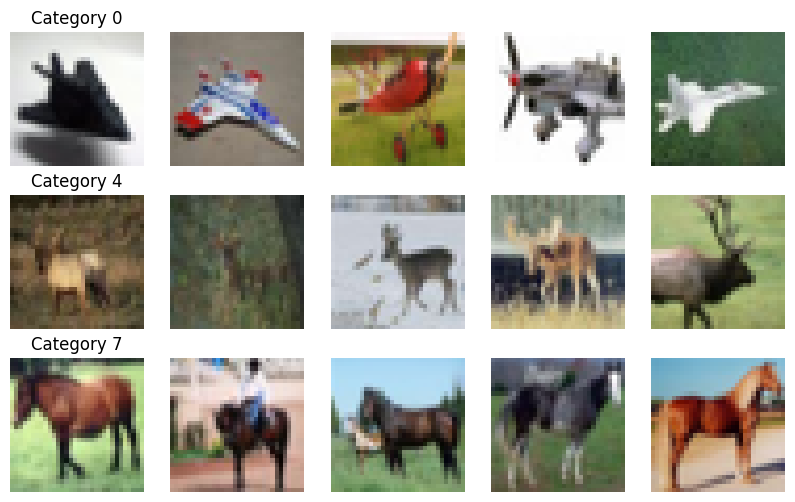

In [38]:
def plot_sample_images(data, labels, categories, num_samples=5):
    fig, axs = plt.subplots(len(categories), num_samples, figsize=(num_samples * 2, len(categories) * 2))

    for idx, category in enumerate(categories):
        indices = np.where(labels == category)[0]
        indices = indices[:num_samples]  # Select the first 'num_samples' indices

        for j, image_index in enumerate(indices):
            ax = axs[idx, j] if len(categories) > 1 else axs[j]
            ax.imshow(data[image_index])
            ax.axis('off')
            if j == 0:
                ax.set_title(f"Category {category}")
    plt.show()

# Plot images from the categories
plot_sample_images(x_filtered, y_filtered.flatten(), categories)


In [42]:

num_samples_per_category = 5
# Filter data for airplanes, deer, and horses
x_filtered = []
y_filtered = []
for category in categories:
    category_images = x_train[y_train.flatten() == category][:num_samples_per_category]
    category_labels = y_train[y_train.flatten() == category][:num_samples_per_category]
    x_filtered.extend(category_images)
    y_filtered.extend(category_labels)

x_filtered = np.array(x_filtered)
y_filtered = np.array(y_filtered)

# Define the number of clusters
num_clusters = 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

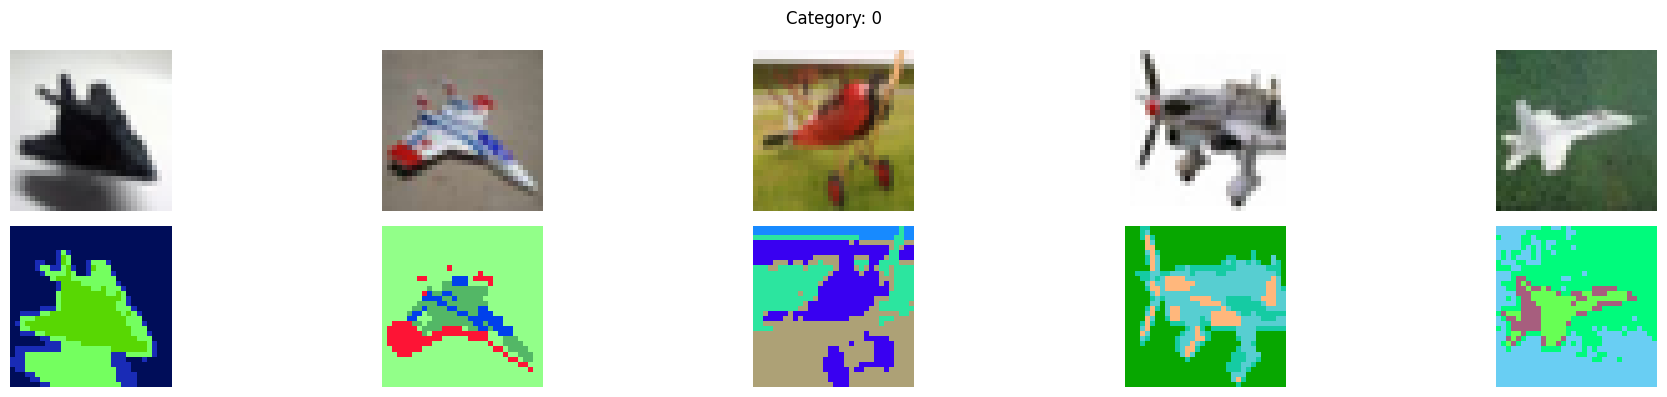

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

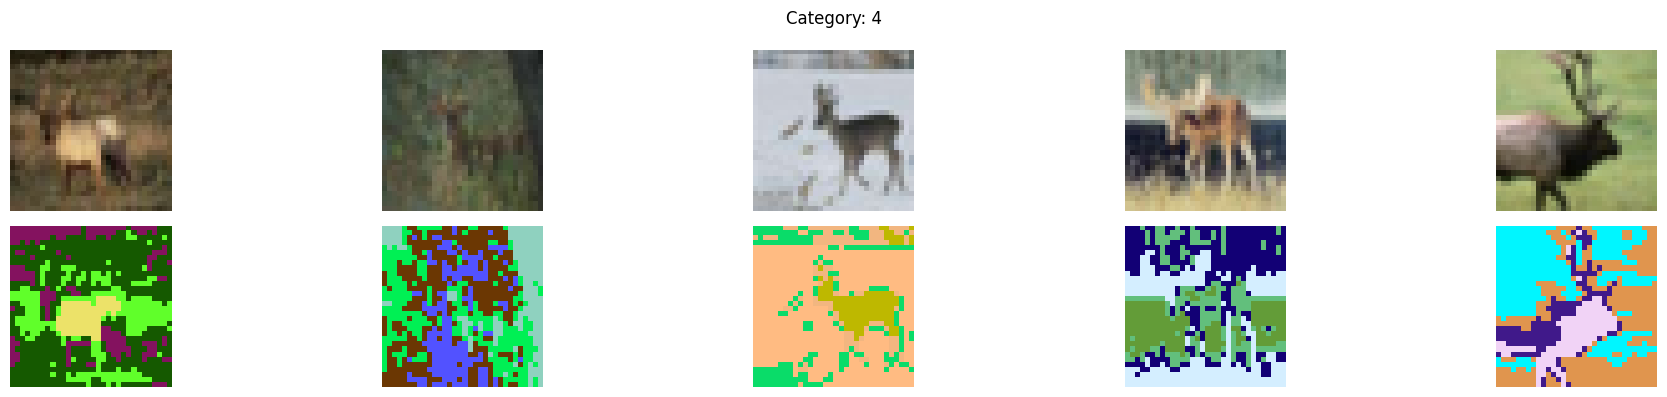

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

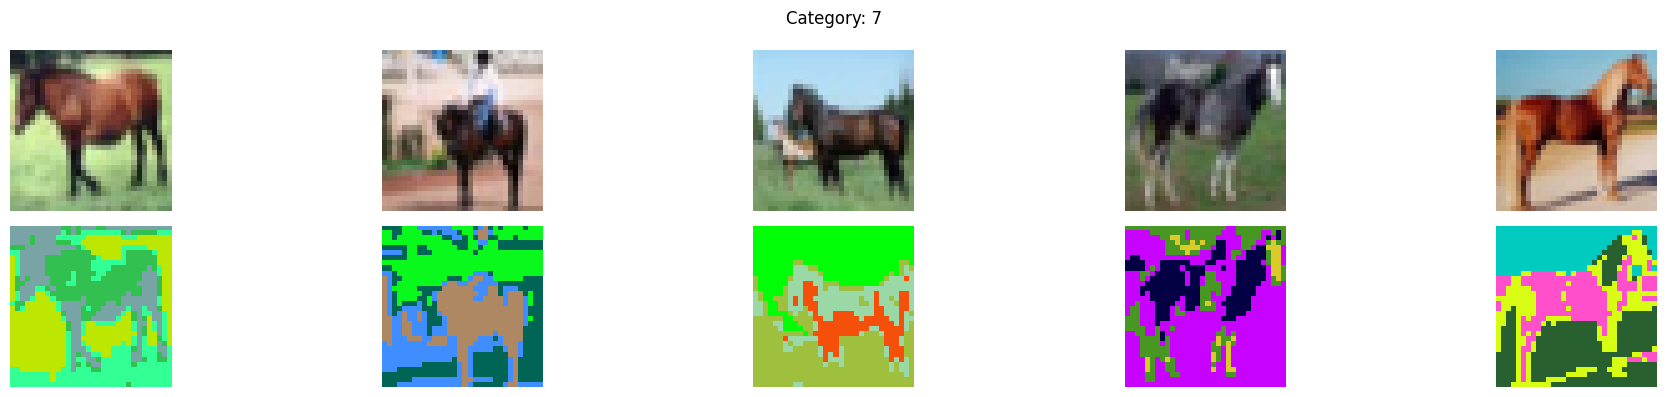

In [55]:
for i, category in enumerate(categories):
    # Get images for the current category
    category_images = x_filtered[i*num_samples_per_category: (i+1)*num_samples_per_category]

    # Create a figure for the current category
    num_images = len(category_images)
    figsize = (num_images * 4, 4)  # Increased width to accommodate both images
    fig, axs = plt.subplots(2, num_images, figsize=figsize)  # 2 rows for original and clustered

    # Iterate over each image in the current category
    for j, image in enumerate(category_images):
        # Prepare the image for clustering
        pixels = image.reshape(-1, 3) / 255.0

        # Apply PCA to reduce dimensions
        pca = PCA(n_components=3)
        pixels_pca = pca.fit_transform(pixels)

        # Apply k-means clustering
        kmeans = KMeans(n_clusters=num_clusters)
        pixel_clusters = kmeans.fit_predict(pixels_pca)

        # Create the overlay image with clustered regions
        overlay_image = np.zeros_like(image, dtype=np.float32)
        for cluster_idx in range(num_clusters):
            cluster_mask = pixel_clusters == cluster_idx
            reshaped_mask = cluster_mask.reshape(image.shape[:2])
            overlay_image[reshaped_mask] = np.random.rand(3)  # Random color for each cluster

        # Resize the overlay image to match the original image size
        resized_overlay_image = resize(overlay_image, (image.shape[1], image.shape[0]))

        # Normalize and convert data type
        resized_overlay_image = ((resized_overlay_image - resized_overlay_image.min()) /
                                 (resized_overlay_image.max() - resized_overlay_image.min()) * 255).astype(np.uint8)

        # Display the original image
        axs[0, j].imshow(image)
        axs[0, j].axis('off')

        # Display the clustered image
        axs[1, j].imshow(resized_overlay_image)
        axs[1, j].axis('off')

    plt.suptitle(f'Category: {category}')  # Add category title to the figure
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

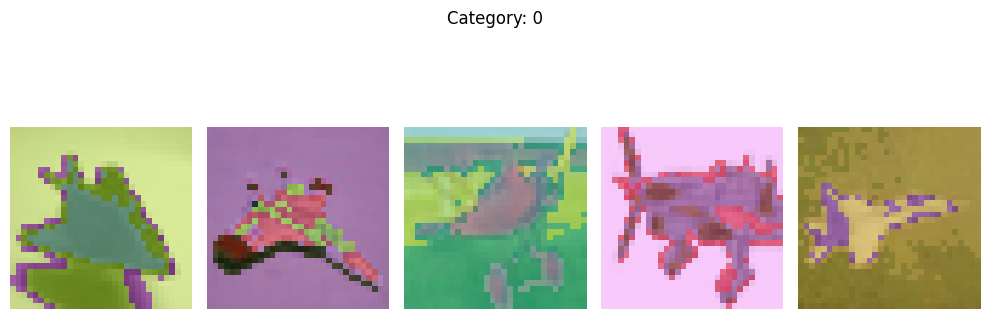

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

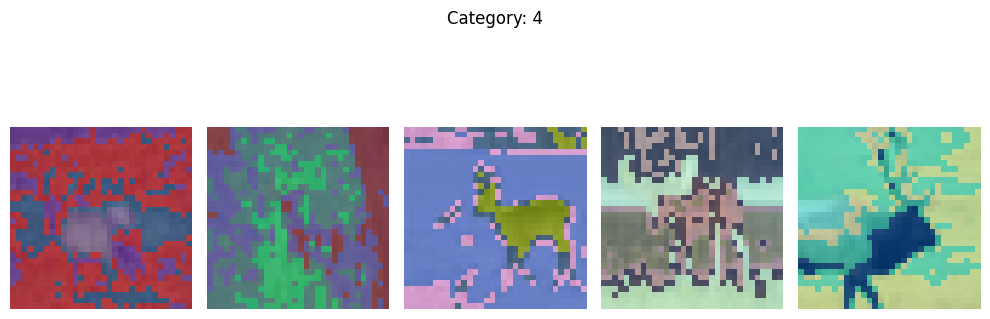

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

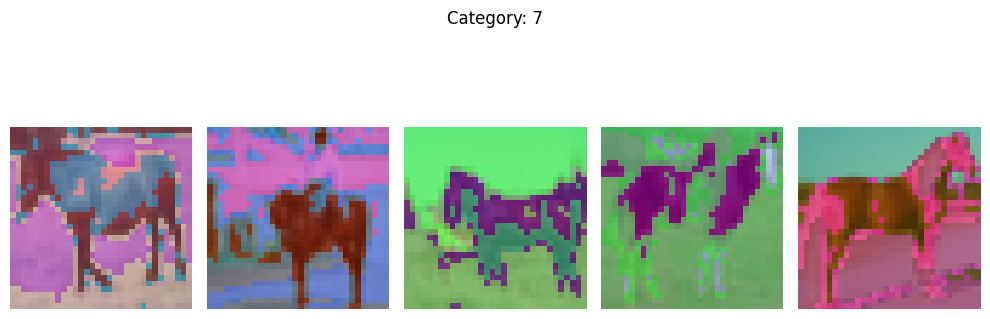

In [54]:
from skimage.transform import resize

for i, category in enumerate(categories):
    # Get images for the current category
    category_images = x_filtered[i*num_samples_per_category: (i+1)*num_samples_per_category]

    # Create a figure for the current category
    num_images = len(category_images)
    figsize = (num_images * 2, 4)
    fig, axs = plt.subplots(1, num_images, figsize=figsize)

    # Iterate over each image in the current category
    for j, image in enumerate(category_images):
        # Prepare the image for clustering
        pixels = image.reshape(-1, 3) / 255.0

        # Apply PCA to reduce dimensions
        pca = PCA(n_components=3)
        pixels_pca = pca.fit_transform(pixels)

        # Apply k-means clustering
        kmeans = KMeans(n_clusters=num_clusters)
        pixel_clusters = kmeans.fit_predict(pixels_pca)

        # Create the overlay image with clustered regions
        overlay_image = np.zeros_like(image, dtype=np.float32)
        for cluster_idx in range(num_clusters):
            cluster_mask = pixel_clusters == cluster_idx
            reshaped_mask = cluster_mask.reshape(image.shape[:2])
            overlay_image[reshaped_mask] = np.random.rand(3)  # Random color for each cluster

        # Resize the overlay image to match the original image size
        resized_overlay_image = resize(overlay_image, (image.shape[1], image.shape[0]))

        # Normalize values if necessary
        resized_overlay_image = (resized_overlay_image - np.min(resized_overlay_image)) / (np.max(resized_overlay_image) - np.min(resized_overlay_image)) * 255

        # Convert data type to np.uint8
        resized_overlay_image = resized_overlay_image.astype(np.uint8)

        # Display the original image alongside the clustered regions
        axs[j].imshow(image)
        axs[j].imshow(resized_overlay_image, alpha=0.5)  # Overlay clustered regions
        axs[j].axis('off')

    plt.suptitle(f'Category: {category}')  # Add category title to the figure
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

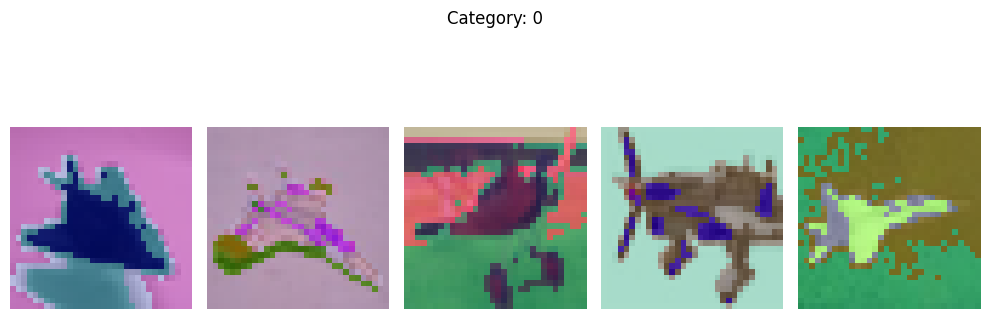

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

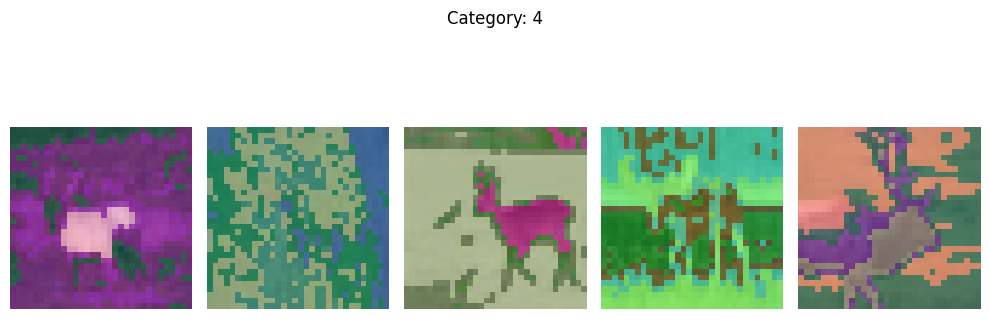

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

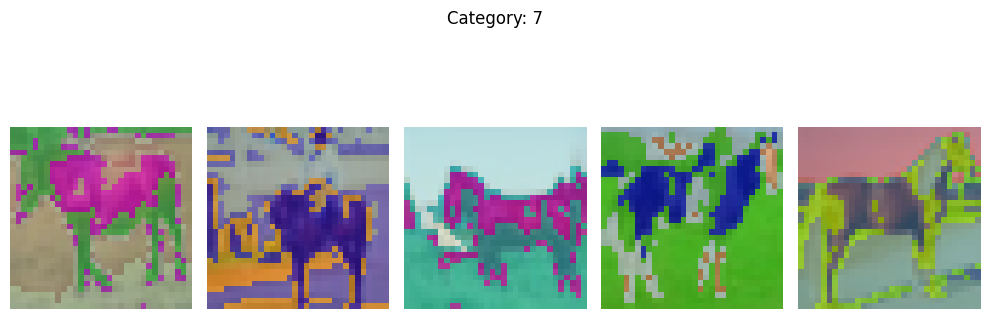

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans

# Iterate over each category and display clustering results
for i, category in enumerate(categories):
    # Get images for the current category
    category_images = x_filtered[i*num_samples_per_category: (i+1)*num_samples_per_category]

    # Create a figure for the current category
    num_images = len(category_images)
    figsize = (num_images * 2, 4)
    fig, axs = plt.subplots(1, num_images, figsize=figsize)

    # Iterate over each image in the current category
    for j, image in enumerate(category_images):
        # Prepare the image for clustering
        pixels = image.reshape(-1, 3) / 255.0

        # Apply kernel PCA to map samples to higher-dimensional space
        kpca = KernelPCA(n_components=50, kernel='rbf')  # Adjust number of components as needed
        pixels_kpca = kpca.fit_transform(pixels)

        # Apply k-means clustering
        kmeans = KMeans(n_clusters=num_clusters)
        pixel_clusters = kmeans.fit_predict(pixels_kpca)

        # Create the overlay image with clustered regions
        overlay_image = np.zeros_like(image, dtype=np.float32)
        for cluster_idx in range(num_clusters):
            cluster_mask = pixel_clusters == cluster_idx
            reshaped_mask = cluster_mask.reshape(image.shape[:2])
            overlay_image[reshaped_mask] = np.random.rand(3)  # Random color for each cluster

        # Resize the overlay image to match the original image size
        resized_overlay_image = overlay_image

        # Normalize values if necessary
        resized_overlay_image = (resized_overlay_image - np.min(resized_overlay_image)) / (np.max(resized_overlay_image) - np.min(resized_overlay_image)) * 255

        # Convert data type to np.uint8
        resized_overlay_image = resized_overlay_image.astype(np.uint8)

        # Display the original image alongside the clustered regions
        axs[j].imshow(image)
        axs[j].imshow(resized_overlay_image, alpha=0.5)  # Overlay clustered regions
        axs[j].axis('off')

    plt.suptitle(f'Category: {category}')  # Add category title to the figure
    plt.tight_layout()
    plt.show()